In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7f10f932d57a7416aba676caefa714f577c039f0a44cb263eb3b617d9d259920
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


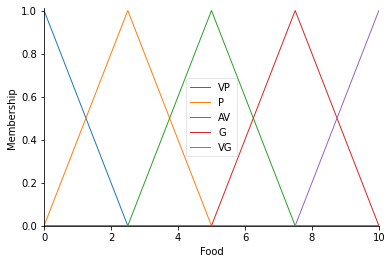

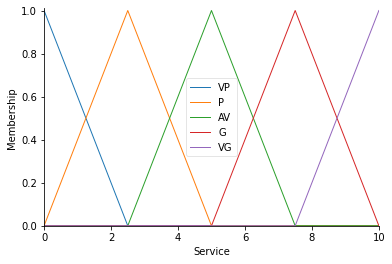

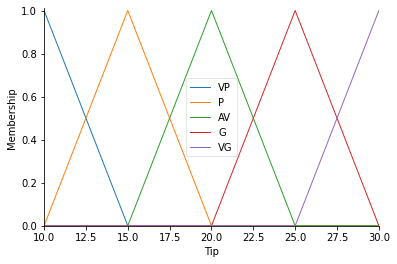

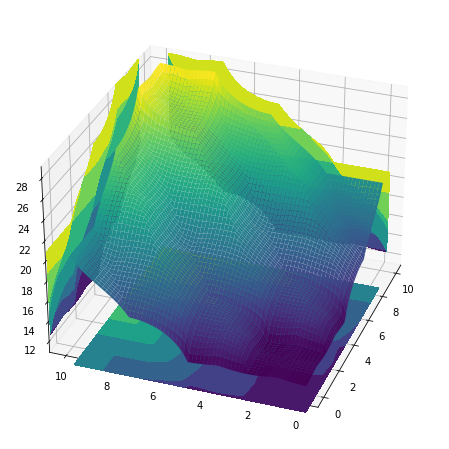

In [3]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_food = np.linspace(0,10,61)
universe_service = np.linspace(0,10,61)
universe_tip = np.linspace(10,30,61) #(Giá trị đầu, Giá trị cuối, Số phần tử trong khoảng)

food = ctrl.Antecedent(universe_food,'Food')
service = ctrl.Antecedent(universe_service,'Service')
tip = ctrl.Consequent(universe_tip,'Tip')

names = ['VP','P','AV','G','VG']
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])|(food['VP']&service['AV'])|(food['P']&service['P'])|(food['AV']&service['VP'])),consequent=tip['VP'])
rule2 = ctrl.Rule(antecedent=((food['VP']&service['G'])|(food['P']&service['AV'])|(food['AV']&service['P'])|(food['G']&service['VP'])),consequent=tip['P'])
rule3 = ctrl.Rule(antecedent=((food['VP']&service['VG'])|(food['P']&service['G'])|(food['AV']&service['AV'])|(food['G']&service['P'])|(food['VG']&service['VP'])|(food['P']&service['VG'])|(food['AV']&service['G'])|(food['G']&service['AV'])|(food['VG']&service['P'])),consequent=tip['AV'])
rule4 = ctrl.Rule(antecedent=((food['AV']&service['VG'])|(food['G']&service['G'])|(food['VG']&service['AV'])),consequent=tip['G'])
rule5 = ctrl.Rule(antecedent=((food['G']&service['VG'])|(food['VG']&service['G'])|(food['VG']&service['VG'])),consequent=tip['VG'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['Food'] = x[i,j]
    sim.input['Service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Tip']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,200)